In [56]:
import warnings

from grad import *
import numpy as np
import matplotlib.pyplot as plt

# Example 1

> $dim = 1$.
>
> $f(x) = x - sin(x) - 69$, where $x \geq 35; -x$, otherwise

In [57]:
def f(coord):
    if coord >= 35:
        return coord - np.sin(coord) - 69
    else:
        return -coord

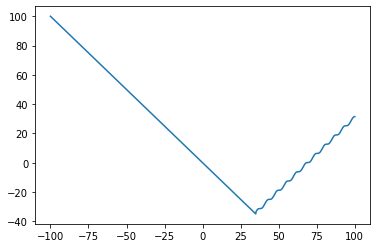

In [58]:
xs = np.linspace(-100, 100, 1000)
ys = list(map(f, xs))

plt.plot(xs, ys)
plt.show()

[34.94024758] [-34.94024758]


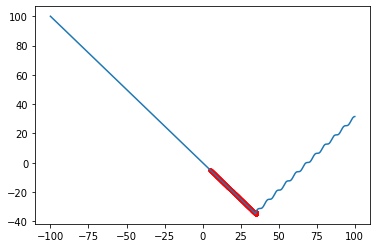

In [59]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    (x, y), meta = gradient_descent(f, 1)
    print(x, y)

    plt.plot(meta["points"][:, 0], meta["points"][:, 1], 'r.')
    plt.plot(xs, ys)
    plt.show()

# Example 2